# Part 2

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/stadtsalat/Documents/Instacart Basket Analysis'

In [3]:
# Importing the most up to date df
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [4]:
# Checking the df
ords_prods_custs.shape

(32404859, 34)

In [5]:
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [6]:
ords_prods_custs.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_registered,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


QN 2 is done

QN 3 -- You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
-In a markdown cell beneath your histogram, describe what the histogram demonstrates.

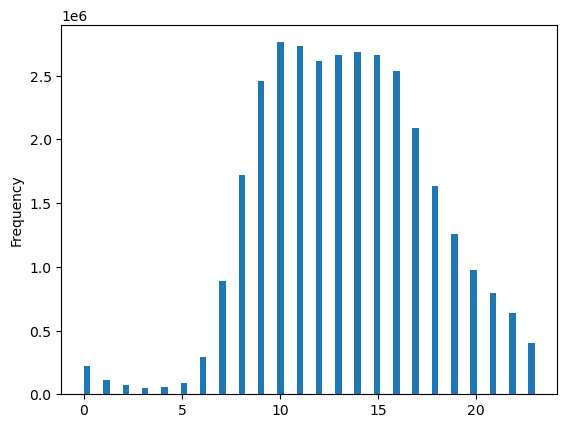

In [35]:
# Creating the histogram
hist_order_hour_of_day=ords_prods_custs['order_hour_of_day'].plot.hist(bins = 70)

The above histogram demonstrates the frequency of the orders per hour. That means, the amount of orders the Instacart receives every hour of the day. This histogram includes the whole dataset. 

QN 4 -- The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

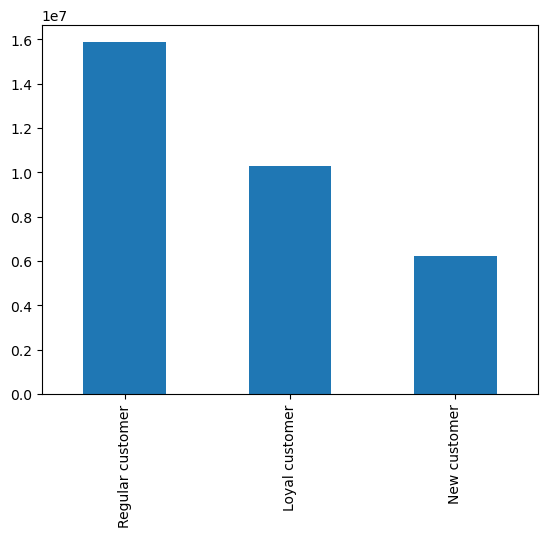

In [32]:
# Creating the bar chart
barchart_customer_loyalty=ords_prods_custs['loyalty_flag'].value_counts().plot.bar()

QN 5 -- Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
# To achieve this we need to create a small subset
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [11]:
dev

array([False,  True, False, ..., False,  True, False])

In [12]:
np.random.seed(4)

In [14]:
# Storing 70% of the df in the new df big
big = ords_prods_custs[dev]

In [15]:
# Storing 30% of the df in the new df smal
small = ords_prods_custs[~dev]

In [16]:
# Checking if the size of the new dfs together is the same as 
len(ords_prods_custs)

32404859

In [17]:
len(big)+len(small)

32404859

In [19]:
# Now we can create a subset in the small sample with just the columns we need
prices_day_of_hour = small[['order_hour_of_day','prices']]

In [20]:
# Checking the new df
prices_day_of_hour.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
8,16,9.0
9,8,9.0
11,8,4.4


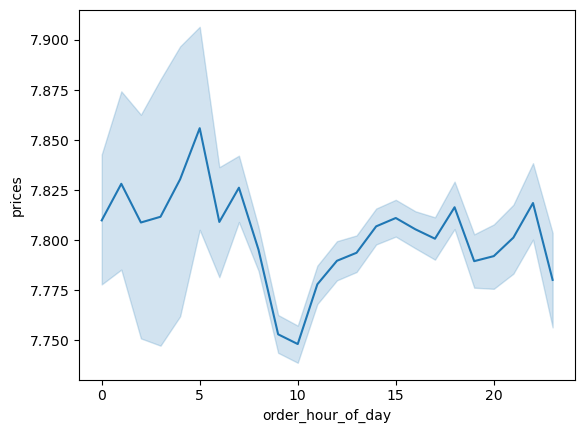

In [21]:
# Creating the line chart
line_prices_day_of_hour = sns.lineplot(data = prices_day_of_hour, x = 'order_hour_of_day',y = 'prices')

QN 6 -- Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
# Creating a new df for the line chart 
age_and_dependants = small[['age','number_of_dependants']]

In [24]:
# Checking the new df
age_and_dependants.head(1)

,age,number_of_dependants
0,31,3


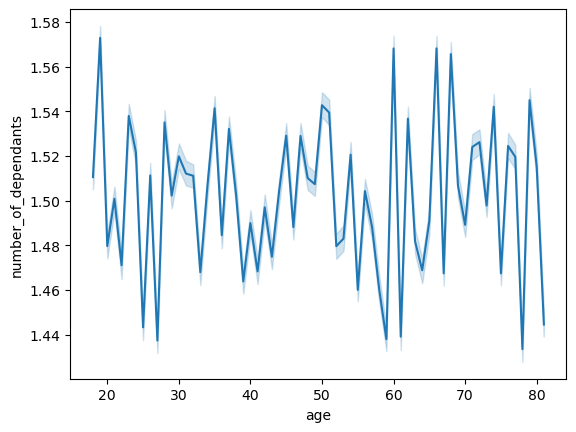

In [25]:
# Creating the line chart
line_age_and_dependants = sns.lineplot(data = age_and_dependants, x = 'age',y = 'number_of_dependants')

In the above chart we see the amount of dependants in relation to the age. It seems that the higher number of dependants is in the early 20s athen after the 60s. That can be , because people have kids in their early 20s, then the kids leave the house when the parents are in their early 40s (that is why the number decreases significantly) and then in the early 60s the number raises again as they might have to support grandchildren.

QN 7 --You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [26]:
# Creating a new df for the scatterplot
age_and_income= small[['age', 'income']]


In [27]:
# Checking the new df
age_and_income.head(1)

,age,income
0,31,40423


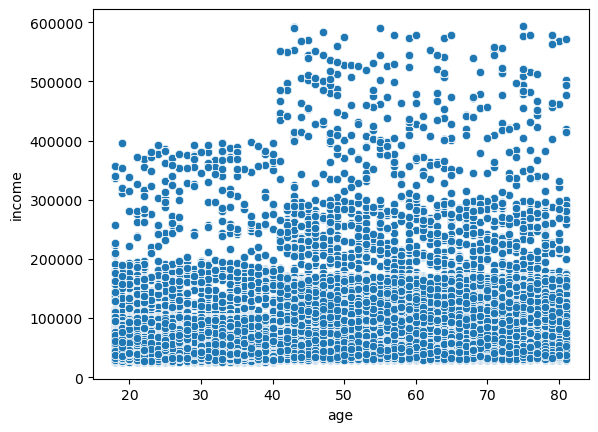

In [28]:
# Creating sthe scatterplot
scatterplot_age_and_income = sns.scatterplot(data = age_and_income, x = 'age', y = 'income' )


In the above scatterplot we see the relation between age and income of the Instacart customers. Here we can see that most of the customers across all ages have a max income of 200000. As the age grows , so is the income with a lot of customers over 40 years old having an income of max 300000 and only a few +40 years old having an income of more than 400000

QN 8 -- Export your visualizations as “.png” files in your relevant project folder.

In [29]:
scatterplot_age_and_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_and_income.png'))


In [30]:
line_age_and_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_dependants.png'))


In [31]:
line_prices_day_of_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_day_of_hour.png'))


In [34]:
barchart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_customer_loyalty.png'))

In [36]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))